<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: reto del fin de semana

El reto de esta semana es implementar el algoritmo de Singular Value Decomposition para comprimir una imagen. Podéis guiaros por lo visto en las clases y os recomiendo también esta web:

https://timbaumann.info/svd-image-compression-demo/

## SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.datasets`
- La implementación del algoritmo en `scipy.linalg`: https://docs.scipy.org/doc/scipy-1.14.0/reference/generated/scipy.linalg.svd.html
- La librería `matplotlib`para las gráficas
- El error SSE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

Lo primero, vemos la imagen que vamos a comprimir:

In [6]:
!pip install pooch

   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.6 kB ? eta -:--:--
   ------------ --------------------------- 20.5/64.6 kB 162.5 kB/s eta 0:00:01
   ------------------------- -------------- 41.0/64.6 kB 217.9 kB/s eta 0:00:01
   ---------------------------------------- 64.6/64.6 kB 315.9 kB/s eta 0:00:00


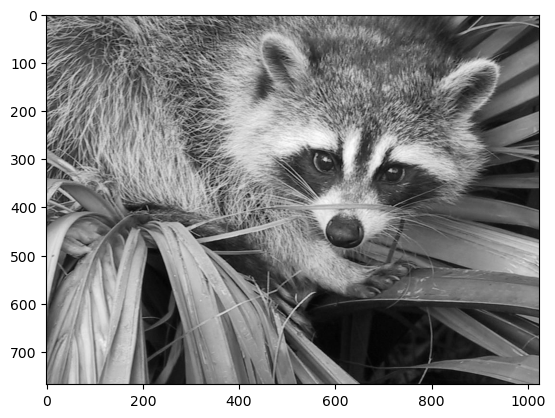

In [40]:
import matplotlib.pyplot as plt
from scipy import misc, datasets
%matplotlib inline

# Load image
A = datasets.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

# IMAGEN COMPRIMIDA
# plt.imshow(A_hat, cmap=plt.cm.gray)

In [27]:
A

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [29]:
type(A)

numpy.ndarray

In [31]:
np.shape(A)

(768, 1024)

Las siguientes funciones te ayudarán a llegar a la solución final:

### 1. Implementa la función para el SEE (en clase)
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [9]:
import numpy as np

def sse_score(X, X_hat):
    return np.sum((X - X_hat)**2) 


### 2. Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [86]:
import numpy as np
from scipy.linalg import svd

def svm(X):
        U,S,Vt = np.linalg.svd(X,full_matrices = False)
        return U, S, Vt # S es una matriz diagonal (identidad x autovalores). /// Vt lleva la "t" porque es por filas no por columnas


### 3. Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [15]:
def reconstruction(U, S, Vt):
    Si=np.diag(S)
    X_hat = np.dot(U,np.dot(Si,Vt))
    return X_hat


En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [21]:
# sse = sse_score(X, X_hat)
# print(f"El error de reconstrucción es: {sse}")

### 4. Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. 

In [96]:
### TODO: Función que recibe una imagen A y devuelve la imagen comprimida
### Tiene como entrada A y el número de componentes para realizar la reducción de dimensionalidad
### Devuelve la imagen comprimidad y el error de reconstrucción

def image_compression(A, n_comp):
    # TODO 1: Aplicar SVD (usando la función que hemos creado)
    U, S, Vt = svm(A)  
    
    # TODO 2: Reconstruir usando solo el número de componentes n_comp (usando la función que hemos creado)
    S_comp = S[:n_comp]
    U_comp = U[:,:n_comp]
    Vt_comp = Vt[:n_comp]
    A_hat = reconstruction(U_comp, S_comp, Vt_comp)
    
    # TODO 3: Calcular el error
    sse = sse_score(A, A_hat)  

    return A_hat, sse # A_hat es la matriz comprimida y sse es su error respecto de A



### 5. Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`.

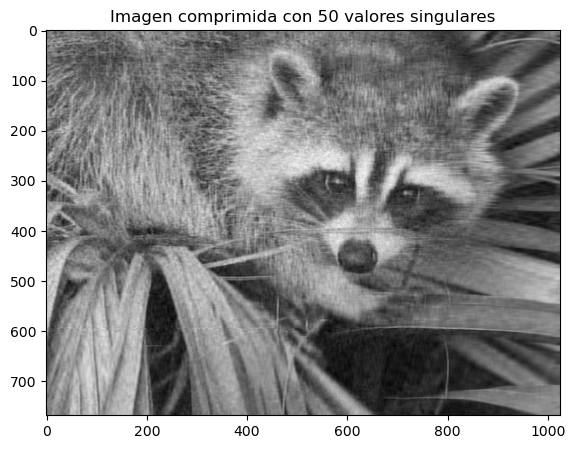

In [100]:
import matplotlib.pyplot as plt


# 1 Crear gráfica con plt.figure()
plt.figure(figsize=(10,5))

# 2 Elegir un n_comp y aplicar la función image_compression()
n_comp = 50
A = datasets.face(gray=True)
A_hat, sse = image_compression(A, n_comp=50)

# 3 Usar plt.imshow(A_hat, cmap=plt.cm.gray), donde A_hat va a ser la matriz comprimida resultante del paso anterior
plt.imshow(A_hat, cmap=plt.cm.gray)
plt.imshow(racoon_hat, cmap=plt.cm.gray)

# 4 Añadir un título a la gráfica con variable de f-string: f'Gráfica de la imagen con {n_comp} valores singulares'
plt.title(f"Imagen comprimida con {n_comp} valores singulares")
plt.show()

# Repetir para distintas compresiones (distinto n_comp)

In [170]:
lista_nc = [n for n in range(1,250,1)]
lista_sse = []
A = datasets.face(gray=True)

for n in lista_nc:
    A_hat , sse = image_compression(A, n)
    lista_sse.append(sse)
    

(0.0, 1251000000.0)

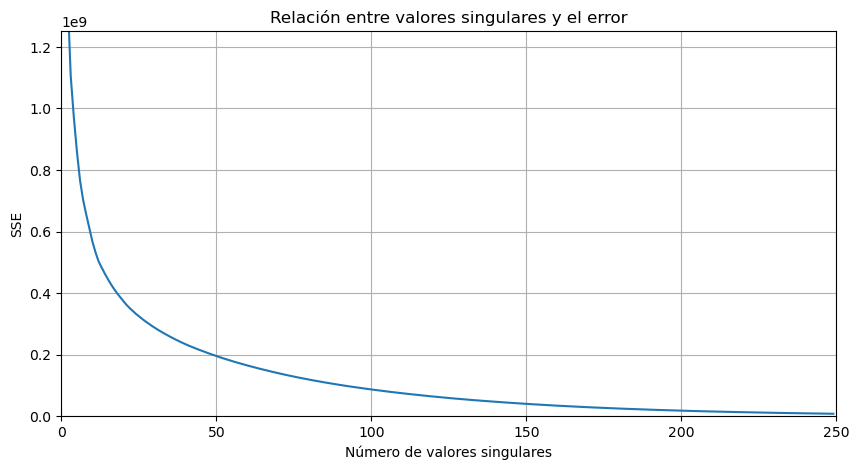

In [174]:
plt.figure(figsize = (10,5))
plt.plot(lista_nc,lista_sse)
plt.title("Relación entre valores singulares y el error")
plt.xlabel("Número de valores singulares")
plt.ylabel("SSE")
plt.grid()

ax = plt.gca()
ax.set_xlim([0, 250])
ax.set_ylim([0, 1.251e9])